In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chisquare

In [18]:
df = pd.read_csv('data/Junior Risk Analyst - 1.csv')
df

,result
0,22
1,35
2,36
3,25
4,11
...,...
99995,27
99996,34
99997,19
99998,1


In [19]:
value_counts = df['result'].value_counts().sort_index()

C:\Users\valik\AppData\Local\Temp\ipykernel_10828\4077141593.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


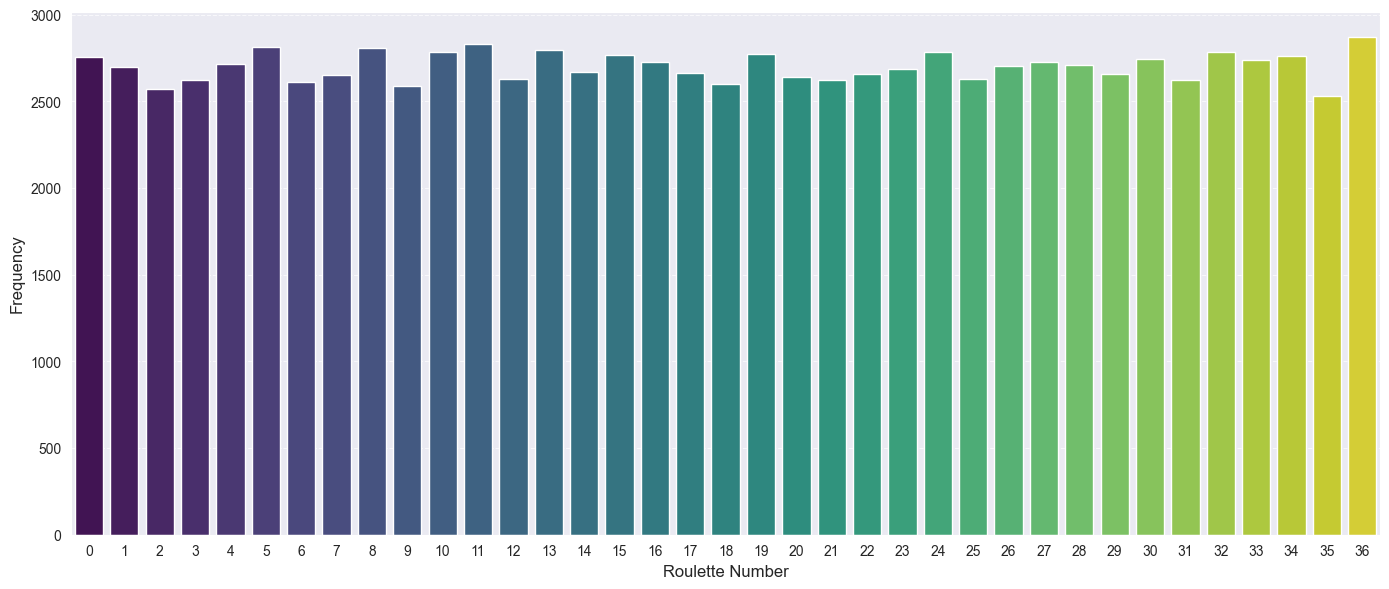

In [20]:
plt.figure(figsize=(14, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
plt.xlabel("Roulette Number", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(range(0, 37))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [21]:
expected_freq = [len(df) / 37] * 37  # Expected frequency for uniform distribution
chi2_stat, p_value = chisquare(f_obs=value_counts.values, f_exp=expected_freq)

In [22]:
mean_freq = value_counts.mean()
std_freq = value_counts.std()
min_freq = value_counts.min()
max_freq = value_counts.max()

print(f"Mean frequency: {mean_freq:.2f}")
print(f"Standard deviation: {std_freq:.2f}")
print(f"Min frequency: {min_freq}")
print(f"Max frequency: {max_freq}")
print(f"Chi-square statistic: {chi2_stat:.2f}")
print(f"p-value: {p_value:.6f}")

Mean frequency: 2702.70
Standard deviation: 81.06
Min frequency: 2534
Max frequency: 2872
Chi-square statistic: 87.53
p-value: 0.000004


In [23]:
sorted_counts = value_counts.sort_values()
print("\nTop 5 Underrepresented Numbers:")
print(sorted_counts.head())

print("\nTop 5 Overrepresented Numbers:")
print(sorted_counts.tail())


Top 5 Underrepresented Numbers:
result
35    2534
2     2574
9     2588
18    2602
6     2613
Name: count, dtype: int64

Top 5 Overrepresented Numbers:
result
13    2797
8     2809
5     2815
11    2831
36    2872
Name: count, dtype: int64


In [24]:
green_numbers = {0}
red_numbers = {1, 3, 5, 7, 9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36}
black_numbers = {2, 4, 6, 8, 10, 11, 13, 15, 17, 20, 22, 24, 26, 28, 29, 31, 33, 35}

In [25]:
df['is_green'] = df['result'].isin(green_numbers).astype(int)
df['is_red'] = df['result'].isin(red_numbers).astype(int)
df['is_black'] = df['result'].isin(black_numbers).astype(int)

In [26]:
green_count = df['is_green'].sum()
red_count = df['is_red'].sum()
black_count = df['is_black'].sum()

In [29]:
print(green_count)
print(red_count)
print(black_count)

2754
48617
48629


In [27]:
df

,result,is_green,is_red,is_black
0,22,0,0,1
1,35,0,0,1
2,36,0,1,0
3,25,0,1,0
4,11,0,0,1
...,...,...,...,...
99995,27,0,1,0
99996,34,0,1,0
99997,19,0,1,0
99998,1,0,1,0


C:\Users\valik\AppData\Local\Temp\ipykernel_10828\2870207482.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(color_counts.keys()), y=list(color_counts.values()), palette=["green", "red", "black"])


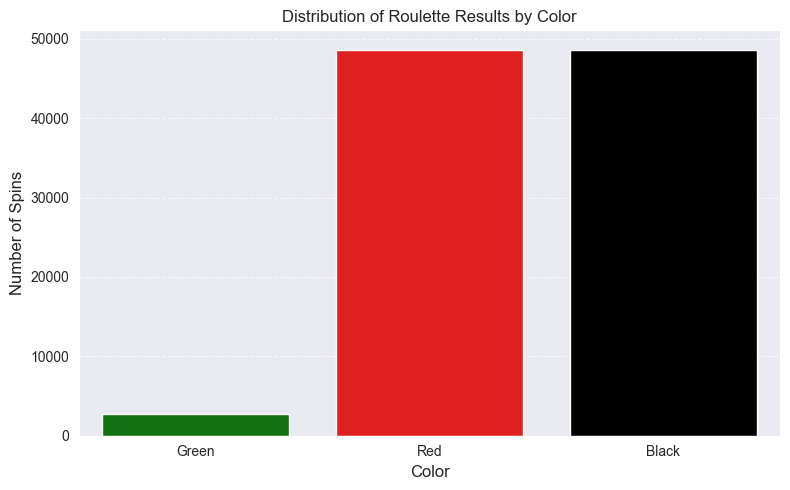

In [32]:
color_counts = {
    'Green': df['is_green'].sum(),
    'Red': df['is_red'].sum(),
    'Black': df['is_black'].sum()
}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(color_counts.keys()), y=list(color_counts.values()), palette=["green", "red", "black"])
plt.title("Distribution of Roulette Results by Color")
plt.xlabel("Color", fontsize=12)
plt.ylabel("Number of Spins", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()